In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("file:///C:/Users/hp/Downloads/heart.csv")

In [3]:
data.shape

(918, 12)

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

### check for missing value

In [6]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Cleaning the dataset

In [8]:
data.dropna(inplace=True)
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
data.shape

(918, 12)

### Visualising the dataset

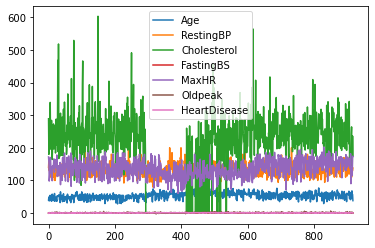

In [10]:
data.plot()
plt.show()

In [11]:
d2=pd.DataFrame(data.groupby(['Sex','HeartDisease'])['Sex'].count())
d2
prop_of_gender=[]
for val in np.sort(data['Sex'].unique()):
    prop=d2['Sex'][val][1]/(d2['Sex'][val][1]+d2['Sex'][val][0])
    prop_of_gender.append({
        'Sex':val,
        'proportion':prop
    })
prop_of_gender=pd.DataFrame(prop_of_gender)
prop_of_gender.sort_values('proportion',ascending=False,inplace=True)
prop_of_gender

,Sex,proportion
1,M,0.631724
0,F,0.259067


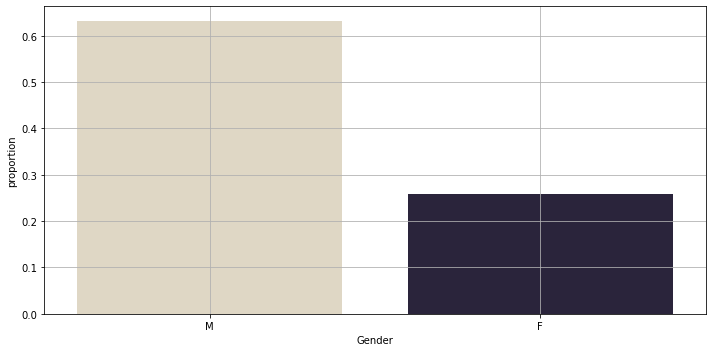

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x=prop_of_gender['Sex'],y=prop_of_gender['proportion'],palette='ch:s=-.2,r=.6',order=prop_of_gender['Sex'])
plt.xlabel('Gender')
plt.tight_layout()
plt.grid(True)
plt.show()

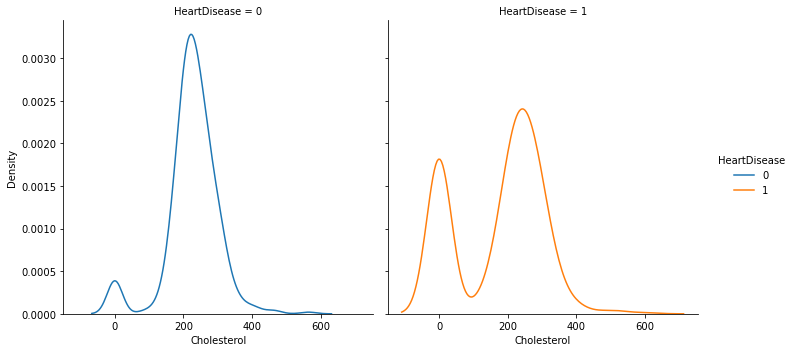

In [13]:
sns.displot(data=data, x="Cholesterol", hue="HeartDisease", col="HeartDisease", kind="kde")

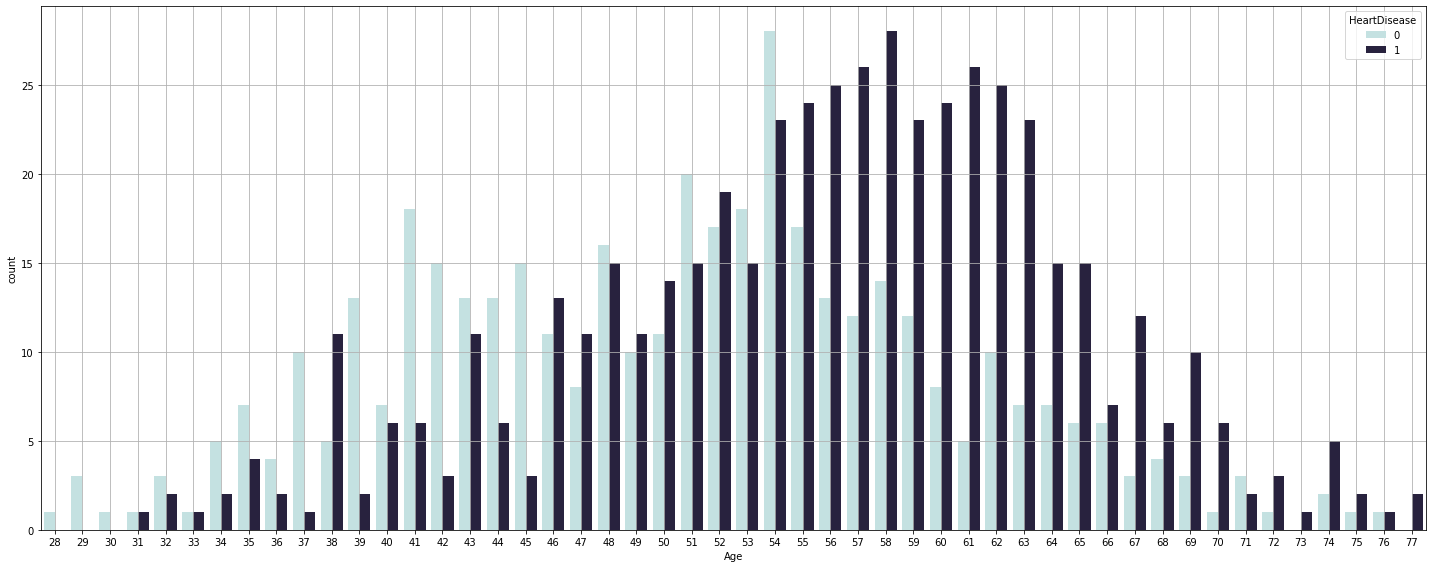

In [14]:
plt.subplots(figsize=(20, 8))
sns.countplot(data['Age'],hue=data['HeartDisease'],palette='ch:start=.2,rot=-.3',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

<AxesSubplot:>

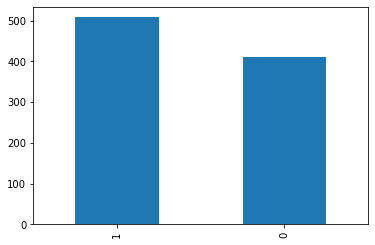

In [15]:
data['HeartDisease'].value_counts().plot(kind='bar')

### Extracting Independent & dependent Variable

In [17]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

### Encode the Categorical Variable

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [19]:
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,6,8,10])], remainder='passthrough')

In [20]:
X=ct1.fit_transform(X)

In [21]:
X=pd.DataFrame(X)

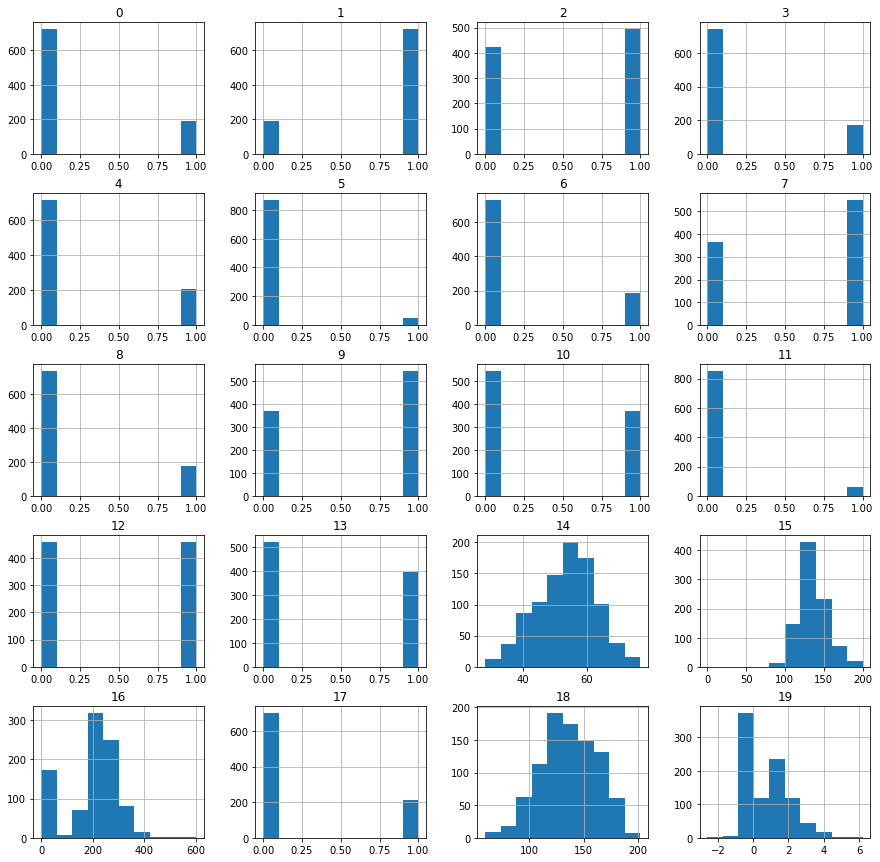

In [22]:
X.hist(figsize=(15,15))
plt.show()

In [23]:
X2=X
y2=y

In [24]:
X2.shape

(918, 20)

### Using Feature selection technique [RFE]

In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [26]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, n_features_to_select= 5)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [False  True  True False False False False False False False  True False
 False  True False False False  True False False]
Feature Ranking: [ 3  1  1  5  7  8 12 10  9  4  1 11  2  1 13 16 15  1 14  6]


In [27]:
fit

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [28]:
fit.n_features_

5

In [29]:
features = fit.transform(X)

In [30]:
print(features[0:5,:])

[[1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0.]
 [1. 0. 0. 1. 0.]]


In [31]:
d=pd.DataFrame(features)

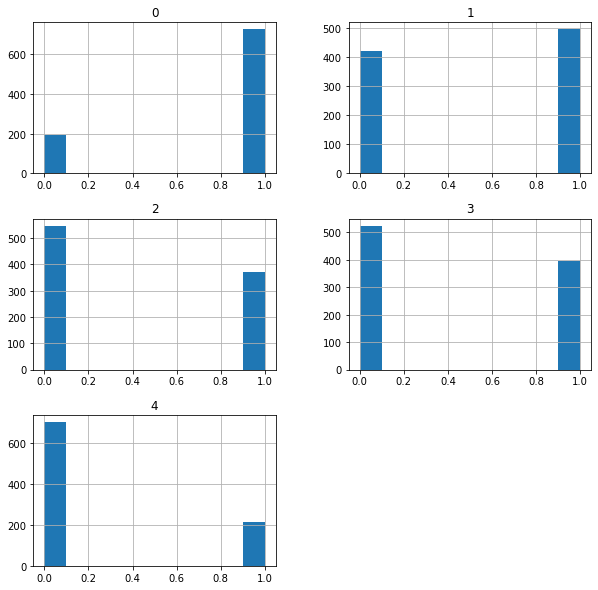

In [32]:
d.hist(figsize=(10,10))
plt.show()

### Splitting the data-set into Training and Test Set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.2, random_state = 4)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size = 0.2, random_state = 4)

In [34]:
X_train_d=pd.DataFrame(X_train)

In [35]:
X_train_d.head()

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0


### Feature Selection

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

scaler.fit(X_train_2)
X_train_2 = scaler.transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

In [37]:
X_train.shape

(734, 5)

In [38]:
X_train_2.shape

(734, 20)

### Training Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
# Train Decision Tree model on the scaled data 
Decision_Tree = DecisionTreeClassifier()
# Fit the model
Decision_Tree.fit(X_train,y_train)
#predict x_test_scaled
pred_1 = Decision_Tree.predict(X_test)

### Checking for Accuracy

In [42]:
def classification_task( model,features_train, y_train ,features_test ,y_test, predic,model_name):
 
    perf_df=pd.DataFrame({'Train_Score':model.score(features_train, y_train),"Test_Score":model.score(features_test, y_test),
                       "Precision_Score":precision_score(y_test,predic, average = 'macro'),"Recall_Score":recall_score(y_test,predic, average = 'macro'),
                       "F1_Score":f1_score(y_test,predic, average = 'macro') , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
Eval_dec= classification_task(Decision_Tree,X_train, y_train ,X_test ,y_test,pred_1,"Decision Tree" )
Eval_dec

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Decision Tree,0.866485,0.86413,0.875663,0.860322,0.861974,0.86413


Feature: 0, Score: 0.07005
Feature: 1, Score: 0.16186
Feature: 2, Score: 0.05170
Feature: 3, Score: 0.65127
Feature: 4, Score: 0.06512


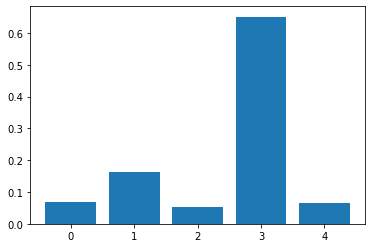

In [44]:
import matplotlib.pyplot as plt
importance = Decision_Tree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


### With Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
# Train Random forest model on the scaled data
Random_Forest= RandomForestClassifier()
# Fit the model
Random_Forest.fit(X_train,y_train)
#predict x_test_scaled
pred_rand = Random_Forest.predict(X_test)
Eval_fores= classification_task(Random_Forest,X_train, y_train ,X_test ,y_test,pred_rand,"Random Forest" )
Eval_fores
Eval_fores= classification_task(Random_Forest,X_train, y_train ,X_test ,y_test,pred_rand,"Random Forest" )
Eval_fores

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Random Forest,0.866485,0.86413,0.875663,0.860322,0.861974,0.86413


### With XGboost

In [47]:
!pip install xgboost

In [48]:
from xgboost import XGBClassifier

# Train XGB boost model on the scaled data
xgb = XGBClassifier()
# Fit the model
xgb.fit(X_train,y_train)
#predict x_test_scaled
pred = xgb.predict(X_test)

In [49]:
Eval_XGB= classification_task(xgb,X_train, y_train ,X_test ,y_test,pred,"XGB" )
Eval_XGB

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
XGB,0.866485,0.86413,0.875663,0.860322,0.861974,0.86413
